In [2]:
print("Hello world")

Hello world


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
from sklearn.model_selection import train_test_split

In [66]:
df = pd.read_csv("./Mall_Customers.csv")

In [67]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [68]:
del df["CustomerID"]
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [69]:
df.shape

(200, 4)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [71]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [72]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [73]:
df.duplicated().sum()

0

In [74]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [75]:
df = df.rename(columns={"Spending Score (1-100)": "Spending Score","Annual Income (k$)":"Annual Income"})
df

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [76]:
df["Age"].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

<BarContainer object of 200 artists>

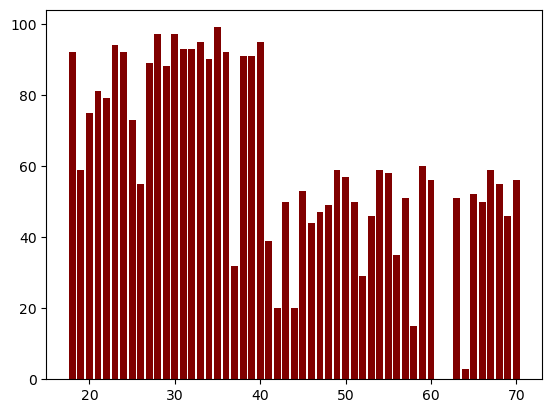

In [77]:
x = df["Age"]
y = df["Spending Score"]

plt.bar(x, y, color ='maroon')



C:\Users\computer\AppData\Local\Temp\ipykernel_8780\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

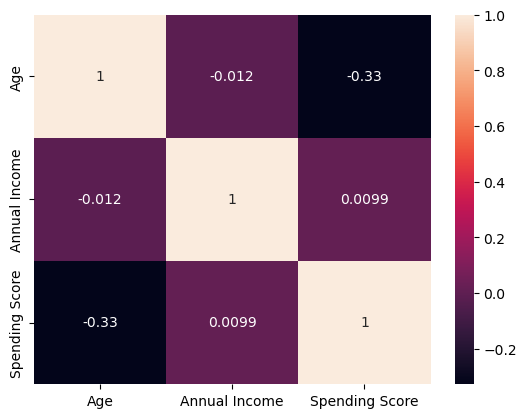

In [78]:
sns.heatmap(df.corr(),annot=True)

In [79]:
#hig = df.query("")

print(df["Spending Score"].max())

99


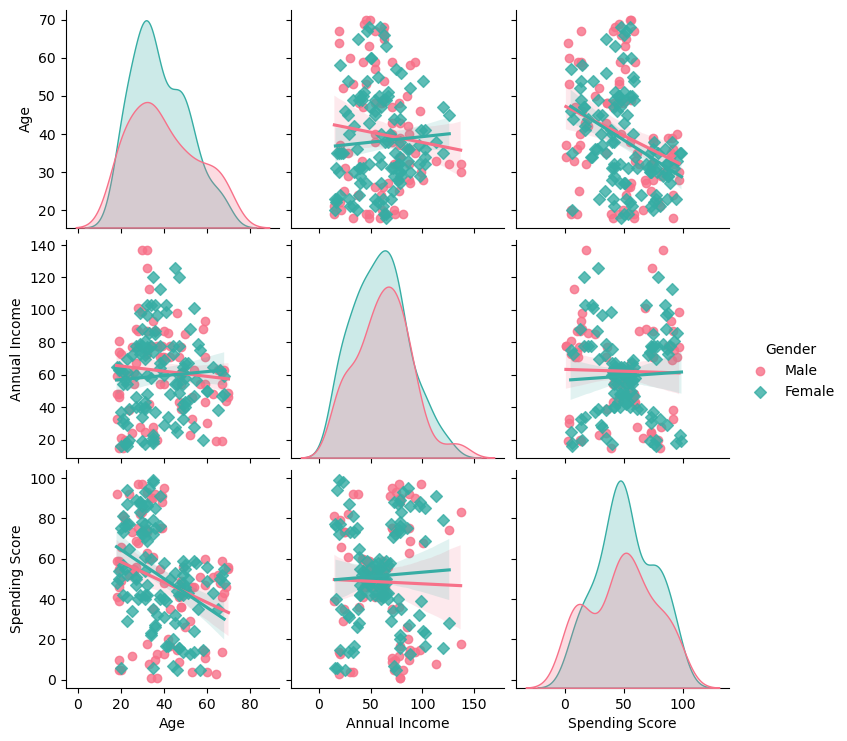

In [80]:
sns.pairplot(df, vars=["Age", "Annual Income", "Spending Score"], kind="reg", hue="Gender", palette="husl", markers=['o','D'])

In [81]:
bins = (0, 18, 25, 30, 50, np.inf)
labels = ['Under 18', '19_to_25', '26_to_30', '31_to_50', 'Over 50']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df_grouped = df.groupby('Age Group')['Spending Score'].mean()
highest_spending_group = df_grouped.idxmax()

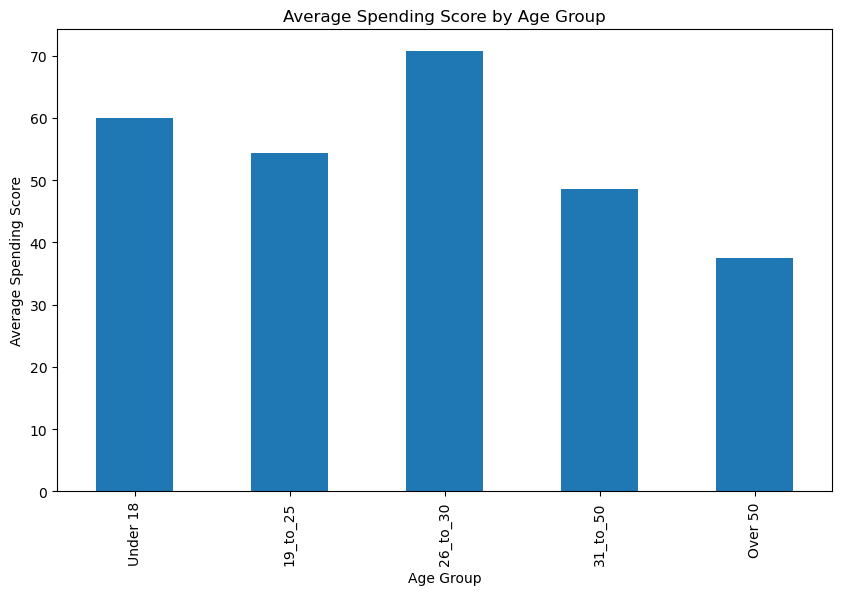

In [82]:
df_grouped.plot.bar(figsize=(10,6))
plt.title('Average Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.show()

In [86]:
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

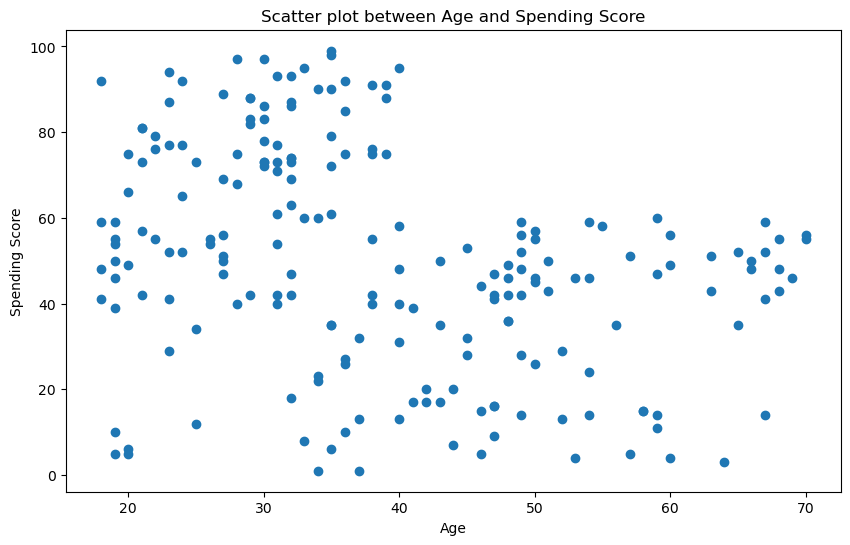

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['Spending Score'], marker='o');
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Scatter plot between Age and Spending Score')
plt.show()

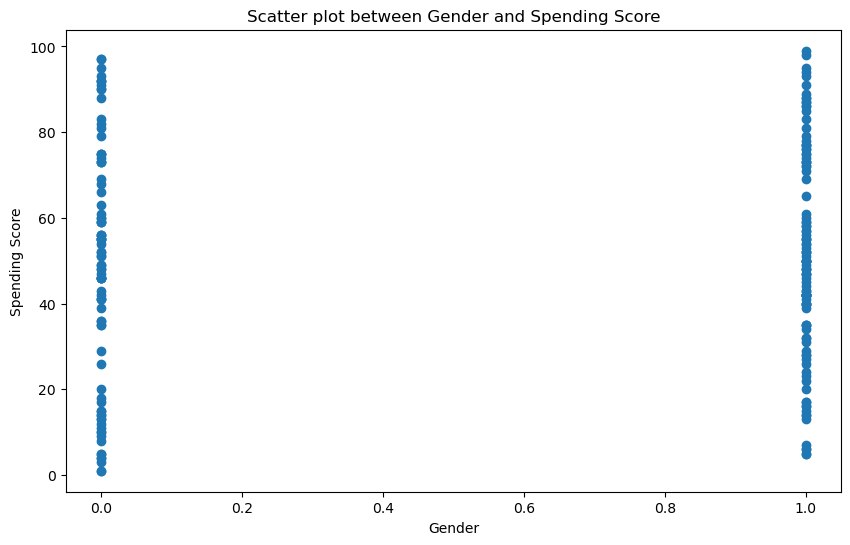

In [88]:
plt.figure(figsize=(10,6))
plt.scatter(df['Gender'],df['Spending Score'], marker='o');
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Scatter plot between Gender and Spending Score')
plt.show()

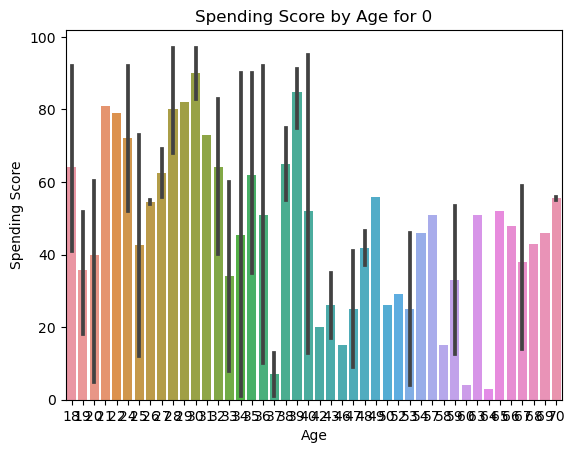

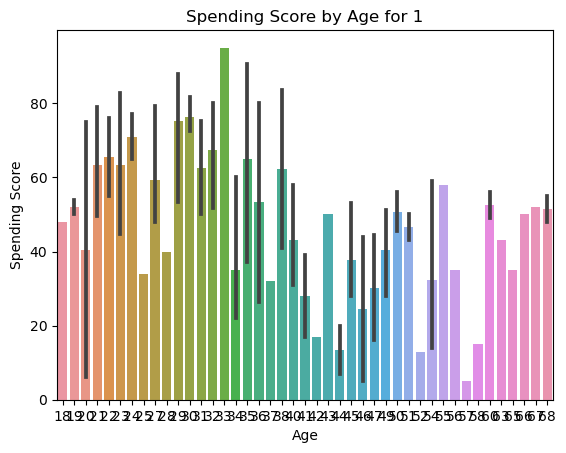

In [89]:
for gender in df['Gender'].unique():

   sns.barplot(x='Age', y='Spending Score', data=df[df['Gender'] == gender])
   plt.title(f'Spending Score by Age for {gender}')
   plt.show()

In [90]:
del df["Gender"]
df

,Age,Annual Income,Spending Score,Age Group
0,19,15,39,19_to_25
1,21,15,81,19_to_25
2,20,16,6,19_to_25
3,23,16,77,19_to_25
4,31,17,40,31_to_50
...,...,...,...,...
195,35,120,79,31_to_50
196,45,126,28,31_to_50
197,32,126,74,31_to_50
198,32,137,18,31_to_50


In [91]:
del df["Age Group"]

In [92]:
df

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [93]:
sc = StandardScaler()
sc_data = sc.fit_transform(df)

In [95]:
df = pd.DataFrame(sc_data)
df

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [110]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

In [111]:
clusters_centers, k_values = find_best_clusters(df, 12)

C:\Users\computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\computer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

In [112]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

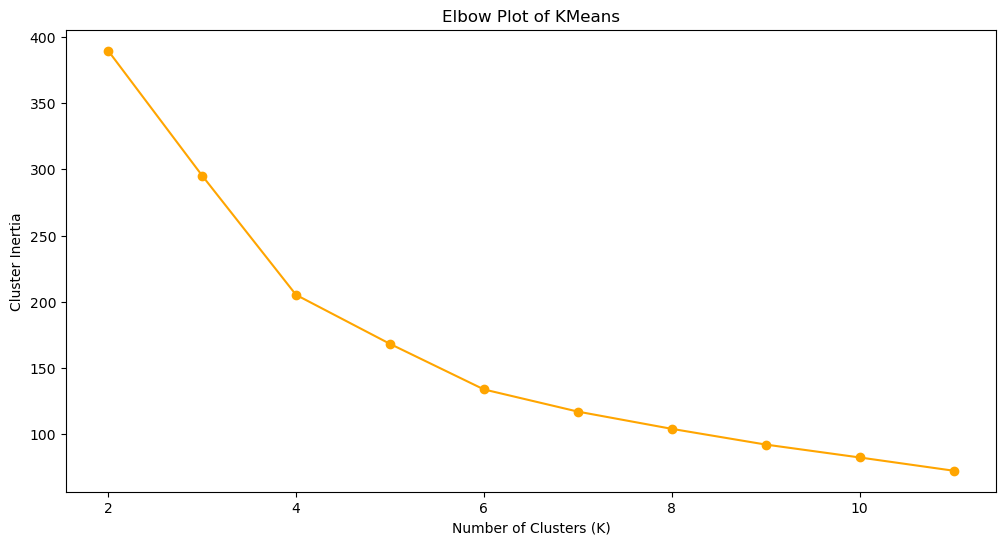

In [113]:
generate_elbow_plot(clusters_centers, k_values)